In [275]:
import construction as cs
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp


import dynamic_metrics as ds


import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'




%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [276]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+"t.dat")
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name,gap=299):
    path = "../Generated_graphs/ETNgen-"+file_name+"t.dat" 
    graphs = []
    data_in = cs.load_data(path)
    graphs = cs.build_graphs(data_in,gap)
    return graphs


def load_tag_graph(file_name):
    path = "../Competitors_generated_graphs/TagGen/"+file_name+"t_599_generato_TagGen.dat"
    gap = 0 
    graphs = []
    data_in = cs.load_data(path)
    graphs = cs.build_graphs(data_in,gap)
    return graphs

In [277]:
import os 

In [278]:
file_name = "DTU_SMS_1set"
orig_graphs = load_origin_graph(file_name,gap=599)
etn_gen = load_ETNgen_graph(file_name)
tag_gen = load_tag_graph(file_name)

len(orig_graphs),len(etn_gen),len(tag_gen)

(1007, 1008, 1007)

In [250]:
nb_nodes_lh = [75,[75.0,0],[182.4, 12.009995836801943],[18.6, 2.727636339397171],[75.0,0]]
nb_nodes_in = [92,[92.0,0],[200.6, 28.51385628076287],[91.7, 0.45825756949558394],[92.0,0]]
nb_nodes_hs = [126,[126.0,0],[370.6, 18.211260252931424],[58.7, 6.542935121182236],[126.0,0]]

In [251]:
import os

path = "dynamic_results/SI/"+file_name
COV = path+"/coverage"
MFPTs = path+"/MFPT"

if not os.path.exists(path):
    os.makedirs(path)
    os.makedirs(COV)
    os.makedirs(MFPTs)

# coverage

k volte, con n0 e t0 random

In [252]:
from scipy.stats import ks_2samp

In [253]:
K = 500
T = 500
c_stm,c_mio,c_tag,c_dym = [],[],[],[]

c_orig = ds.coverage(orig_graphs,K,T)
c_stab = ds.coverage(orig_graphs,K,T)
for etn in [etn_gen]:
    c_mio.append(ds.coverage(etn,K,T))
print("ETN done")
for tag in [tag_gen]:
    c_tag.append(ds.coverage(tag,K,T))
print("TAG done")

ETN done
TAG done


In [254]:
def mean_ks(c_orig,c_gens):
    res = []
    for i in c_gens:
        res.append(ks_2samp(c_orig,i)[0])
    return np.mean(res),np.std(res)

In [255]:

print("coverage")
print("orig vs sta \t",ks_2samp(c_orig, c_stab)[0])
print("orig vs mio \t",mean_ks(c_orig, c_mio))
print("orig vs tag \t",mean_ks(c_orig, c_tag))

coverage
orig vs sta 	 0.044
orig vs mio 	 (0.48, 0.0)
orig vs tag 	 (0.316, 0.0)


In [256]:
np.save(COV+"/stab",c_stab)
np.save(COV+"/orig",c_orig)
np.save(COV+"/tag",c_tag)
np.save(COV+"/etn",c_mio)

# MFPT

In [113]:
MFPTs

'dynamic_results/SI/DTU_calls_1set/MFPT'

In [279]:
file_name = "DTU_calls_1set"

orig_graphs = load_origin_graph(file_name,gap=599)
etn_gen = load_ETNgen_graph(file_name)
tag_gen = load_tag_graph(file_name)

len(orig_graphs),len(etn_gen),len(tag_gen)

(1003, 1005, 1003)

In [280]:
K = 1
m_ori = ds.MFPT(orig_graphs,K)

In [281]:
m_ori2 = [x for x in m_ori if x < max(m_ori)-10]
print(1)
m_stb = ds.MFPT(orig_graphs,K)
m_stb2 = [x for x in m_stb if x < max(m_ori)-10]
print(2)

1
2


In [287]:
m_mio2,m_tag2,= [],[]

c = 0
for etn in [etn_gen]:
    c = c + 1
    print("\t",c)
    m_mio = ds.MFPT(etn,K)
    tmp = [x for x in m_mio if x < max(m_ori)-10]
    m_mio2.append(tmp)
print("ETN done")

c = 0
for tag in [tag_gen]:
    c = c + 1
    print("\t",c)
    m_tag = ds.MFPT(tag,K)
    tmp = [x for x in m_tag if x < max(m_ori)-10]
    m_tag2.append(tmp)
print("TAG done")


	 1
ETN done
	 1
TAG done


In [295]:
len(m_ori),len(m_mio)

(94864, 94864)

In [298]:
print("orig vs sta \t",ks_2samp(m_ori, m_stb)[0])
print("orig vs mio \t",ks_2samp(m_ori, m_mio)[0])
print("orig vs mio \t",ks_2samp(m_ori, m_tag)[0])

orig vs sta 	 5.2707033226513916e-05
orig vs mio 	 0.9937278630460449
orig vs mio 	 0.04029979760499241


In [299]:
print("orig vs sta \t",ks_2samp(m_ori2, m_stb2)[0])
print("orig vs mio \t",ks_2samp(m_ori2, m_mio)[0])
print("orig vs mio \t",ks_2samp(m_ori2, m_tag)[0])

orig vs sta 	 0.0069091361037669765
orig vs mio 	 0.9938332771124979
orig vs mio 	 0.9534913138809242


In [17]:
np.save(MFPTs+"/stab",m_stb2)
np.save(MFPTs+"/orig",m_ori2)
np.save(MFPTs+"/tag",m_tag)
np.save(MFPTs+"/etn",m_mio)
np.save(MFPTs+"/dym",m_dym)
np.save(MFPTs+"/stm",m_stm)

In [18]:
MFPTs

'dynamic_results/InVS13/Multiple_run/MFPT'

# SIR model

In [164]:
file_name = "DTU_SMS_1set"

In [165]:
import os

path = "dynamic_results/SI/"+file_name+""
R0 = path+"/R0/"
la025 = R0+"la025"
la015 = R0+"la015"
la001 = R0+"la001"
if not os.path.exists(la001):
    os.makedirs(la025)
    os.makedirs(la015)
    os.makedirs(la001)
path

'dynamic_results/SI/DTU_SMS_1set'

In [166]:

orig_graphs = load_origin_graph(file_name,gap=599)
etn_gen = load_ETNgen_graph(file_name)
tag_gen = load_tag_graph(file_name)

len(orig_graphs),len(etn_gen),len(tag_gen)

(1007, 1008, 1007)

In [169]:
for lambd in [0.25]:
    mu =0.005
    K = 100


    if lambd == 0.25:
        la = la025
    if lambd == 0.15:
        la = la015
    if lambd == 0.01:
        la = la001

    print("R0 lambda",lambd,lambd)
    r_ori = ds.compute_r0(K,orig_graphs,lambd,mu)
    r_sta = ds.compute_r0(K,orig_graphs,lambd,mu)
    r_etn,r_stm,r_tag,r_dym = [],[],[],[]
    for etn in [etn_gen]:
        r_etn.append(ds.compute_r0(K,etn,lambd,mu))
    print("Done ETN")
    for tag in [tag_gen]:
        r_tag.append(ds.compute_r0(K,tag,lambd,mu))
    print("Done TAG")

    print("orig vs sta \t",ks_2samp(r_ori, r_sta)[0])
    print("orig vs etn \t",mean_ks(r_ori, r_etn))
    print("orig vs tag \t",mean_ks(r_ori, r_tag))

    np.save(la+"/stab",r_sta)
    np.save(la+"/orig",r_ori)
    np.save(la+"/tag",r_tag)
    np.save(la+"/etn",r_etn)

R0 lambda 0.25 0.25
Done ETN
Done TAG
orig vs sta 	 0.09
orig vs etn 	 (0.15, 0.0)
orig vs tag 	 (0.21, 0.0)


In [172]:
for lambd in [0.15]:
    mu =0.005
    K = 100


    if lambd == 0.25:
        la = la025
    if lambd == 0.15:
        la = la015
    if lambd == 0.01:
        la = la001

    print("R0 lambda",lambd,lambd)
    r_ori = ds.compute_r0(K,orig_graphs,lambd,mu)
    r_sta = ds.compute_r0(K,orig_graphs,lambd,mu)
    r_etn,r_stm,r_tag,r_dym = [],[],[],[]
    for etn in [etn_gen]:
        r_etn.append(ds.compute_r0(K,etn,lambd,mu))
    print("Done ETN")
    for tag in [tag_gen]:
        r_tag.append(ds.compute_r0(K,tag,lambd,mu))
    print("Done TAG")

    print("orig vs sta \t",ks_2samp(r_ori, r_sta)[0])
    print("orig vs etn \t",mean_ks(r_ori, r_etn))
    print("orig vs tag \t",mean_ks(r_ori, r_tag))

    np.save(la+"/stab",r_sta)
    np.save(la+"/orig",r_ori)
    np.save(la+"/tag",r_tag)
    np.save(la+"/etn",r_etn)

R0 lambda 0.15 0.15
Done ETN
Done TAG
orig vs sta 	 0.11
orig vs etn 	 (0.19, 0.0)
orig vs tag 	 (0.12, 0.0)


In [179]:
for lambd in [0.01]:
    mu =0.005
    K = 100


    if lambd == 0.25:
        la = la025
    if lambd == 0.15:
        la = la015
    if lambd == 0.01:
        la = la001

    print("R0 lambda",lambd,lambd)
    r_ori = ds.compute_r0(K,orig_graphs,lambd,mu)
    r_sta = ds.compute_r0(K,orig_graphs,lambd,mu)
    r_etn,r_stm,r_tag,r_dym = [],[],[],[]
    for etn in [etn_gen]:
        r_etn.append(ds.compute_r0(K,etn,lambd,mu))
    print("Done ETN")
    for tag in [tag_gen]:
        r_tag.append(ds.compute_r0(K,tag,lambd,mu))
    print("Done TAG")

    print("orig vs sta \t",ks_2samp(r_ori, r_sta)[0])
    print("orig vs etn \t",mean_ks(r_ori, r_etn))
    print("orig vs tag \t",mean_ks(r_ori, r_tag))

    np.save(la+"/stab",r_sta)
    np.save(la+"/orig",r_ori)
    np.save(la+"/tag",r_tag)
    np.save(la+"/etn",r_etn)

R0 lambda 0.01 0.01
Done ETN
Done TAG
orig vs sta 	 0.0
orig vs etn 	 (0.06, 0.0)
orig vs tag 	 (0.09, 0.0)


# plot

In [6]:

ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal



line_width = 1.5


In [7]:
import os

In [13]:
def load_cov(file_name):
    
    ori = np.load("dynamic_results/SI/"+file_name+"/coverage/orig.npy")
    stb = np.load("dynamic_results/SI/"+file_name+"/coverage/stab.npy")
    etn = np.load("dynamic_results/SI/"+file_name+"/coverage/etn.npy")
    tag = np.load("dynamic_results/SI/"+file_name+"/coverage/tag.npy")
    
    return ori,stb,etn,tag

In [14]:
def load_mfpt(file_name):
    
    ori = np.load("dynamic_results/SI/"+file_name+"/MFPT/orig.npy")
    stb = np.load("dynamic_results/SI/"+file_name+"/MFPT/stab.npy")
    etn = np.load("dynamic_results/SI/"+file_name+"/MFPT/etn.npy", allow_pickle=True)
    tag = np.load("dynamic_results/SI/"+file_name+"/MFPT/tag.npy", allow_pickle=True)
    return ori,stb,etn,tag

def load_r0(file_name,lambd="la001"):
    ori = np.load("dynamic_results/SI/"+file_name+"/R0/"+lambd+"/orig.npy")
    stb = np.load("dynamic_results/SI/"+file_name+"/R0/"+lambd+"/stab.npy")
    etn = np.load("dynamic_results/SI/"+file_name+"/R0/"+lambd+"/etn.npy")
    tag = np.load("dynamic_results/SI/"+file_name+"/R0/"+lambd+"/tag.npy")
    
    return ori,stb,etn,tag

In [15]:
file_name = "High_School12"
cov = load_cov(file_name)
mfpt = load_mfpt(file_name)
ro_025 = load_r0(file_name,"la025")
ro_015 = load_r0(file_name,"la015")
ro_001 = load_r0(file_name,"la001")

In [21]:

mfpt_ms = [ks_2samp(mfpt[0],mfpt[1])[0]]
cov_ms = [ks_2samp(cov[0],cov[1])[0]]

In [27]:
for i in range(len(cov)-2):
    tmp = []
    tmp2 = []
    for j in [cov[i+2]]:
        tmp.append(ks_2samp(cov[0], j)[0])
    for j in [mfpt[i+2]]:
        tmp2.append(ks_2samp(mfpt[0], j)[0])
    cov_ms.append([np.mean(tmp),np.std(tmp)])
    mfpt_ms.append([np.mean(tmp2),np.std(tmp2)])


In [28]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

def compute_ks_cov_mfpt(cov,mfpt):
    
    mfpt_ms = [ks_2samp(mfpt[0],mfpt[1])[0]]
    cov_ms = [ks_2samp(cov[0],cov[1])[0]]
    for i in range(len(cov)-2):
        tmp = []
        tmp2 = []
        for j in [cov[i+2]]:
            tmp.append(ks_2samp(cov[0], j)[0])
        for j in [mfpt[i+2]]:
            tmp2.append(ks_2samp(mfpt[0], j)[0])
        cov_ms.append([np.mean(tmp),np.std(tmp)])
        mfpt_ms.append([np.mean(tmp2),np.std(tmp2)])
        
    return cov_ms,mfpt_ms



def plot_cov_mfpt(ax,file_name,legend=False):
    
    if file_name == "LH10":
        #ax.set_title("Hospital")
        ax.set_ylabel("Hospital")
    if file_name == "InVS13":
        ax.set_ylabel("Workplace")
    if file_name == "High_School11":
        ax.set_ylabel("High school")
        
    cov = load_cov(file_name)
    mfpt = load_mfpt(file_name)
    
    x = np.arange(2)
    cov_ms, mfpt_ms = compute_ks_cov_mfpt(cov,mfpt)
    x1 = np.array([cov_ms[0],mfpt_ms[0]])
    x2 = np.array([cov_ms[1],mfpt_ms[1]])
    x3 = np.array([cov_ms[2],mfpt_ms[2]])
    x4 = np.array([cov_ms[3],mfpt_ms[3]])
    x5 = np.array([cov_ms[4],mfpt_ms[4]])

    
    error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=4, capthick=1)

    width = 0.2
    rects1 = ax.bar(x - 0.3, x2[:,0], width, yerr=x2[:,1], label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
    rects4 = ax.bar(x - 0.1, x3[:,0], width, yerr=x3[:,1], label='STM',color=STM_COLOR, error_kw=error_bar_style)
    rects5 = ax.bar(x + 0.1, x5[:,0], width, yerr=x5[:,1], label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
    rects4 = ax.bar(x + 0.3 , x4[:,0], width, yerr=x4[:,1], label='Dymond',color=DYM_COLOR, error_kw=error_bar_style)
    ax.plot([-0.45,0.45],[x1[0],x1[0]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([1-0.45,1.45],[x1[1],x1[1]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    
              
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    
    ax.yaxis.grid(True, color='lightgrey')
    ax.xaxis.grid(False)
    
    #ax.yaxis.grid(True, color='#FFFFFF')
    #ax.set_facecolor('#EFEFEF')
    #ax.xaxis.grid(False)
    
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')    
    
    labels = ["Coverage","MFPT"]
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=0)
    ax.set_ylim((0,1))

In [29]:
file_name == "High_School12"
cov = load_cov(file_name)
mfpt = load_mfpt(file_name)

x = np.arange(2)
cov_ms, mfpt_ms = compute_ks_cov_mfpt(cov,mfpt)

In [41]:

def compute_ks_r0(la25,la15,la01):
    orig_25 = la25[0]
    orig_15 = la15[0]
    orig_01 = la01[0]
    res = [[[ks_2samp(la25[0], la25[1])[0]],[ks_2samp(la15[0], la15[1])[0]],[ks_2samp(la01[0], la01[1])[0]]]]
    for i in range(len(la25)-2):
        i = i+2
        tmp = []
        for j in [la25[i]]:
            tmp.append(ks_2samp(orig_25, j)[0])
        ks_25 = np.array([np.mean(tmp),np.std(tmp)])
        
        tmp = []
        for j in [la15[i]]:
            tmp.append(ks_2samp(orig_15, j)[0])
        ks_15 = np.array([np.mean(tmp),np.std(tmp)])
        
        
        tmp = []
        for j in [la01[i]]:
            tmp.append(ks_2samp(orig_01, j)[0])
        ks_01 = np.array([np.mean(tmp),np.std(tmp)])
        
        res.append(np.array([ks_25,ks_15,ks_01]))
        
    return res

In [31]:
def plot_r0(ax,file_name,legend=False):
    #if file_name == "LH10":
        #ax.set_title("Hospital")
    #    ax.set_ylabel("Hospital")
    #if file_name == "InVS13":
    #    ax.set_ylabel("Workplace")
    #if file_name == "High_School11":
    #    ax.set_ylabel("High school")
        
    r0_025 = load_r0(file_name,"la025")
    r0_015 = load_r0(file_name,"la015")
    r0_001 = load_r0(file_name,"la001")
    x1,x2,x3,x4,x5 = compute_ks_r0(r0_025,r0_015,r0_001)
    x = np.arange(3)
    width = 0.2
    
    error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=4, capthick=1)

    rects1 = ax.bar(x - 0.3, x2[:,0], width, label='ETN-gen',color=ETN_COLOR, yerr=x2[:,1], error_kw=error_bar_style)
    rects4 = ax.bar(x - 0.1, x3[:,0], width, label='STM',color=STM_COLOR, yerr=x3[:,1], error_kw=error_bar_style)
    rects5 = ax.bar(x + 0.1, x5[:,0], width, label='TagGen',color=TAG_COLOR, yerr=x5[:,1], error_kw=error_bar_style)
    rects4 = ax.bar(x + 0.3 , x4[:,0], width, label='Dymond',color=DYM_COLOR, yerr=x4[:,1], error_kw=error_bar_style)
    
    ax.plot([-0.45,0.45],[x1[0],x1[0]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([1-0.45,1.45],[x1[1],x1[1]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([2-0.45,2.45],[x1[2],x1[2]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    
          
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    
    #ax.yaxis.grid(True, color='#FFFFFF')
    #ax.set_facecolor('#EFEFEF')
    #ax.xaxis.grid(False)
    
    ax.yaxis.grid(True, color='lightgrey')
    ax.xaxis.grid(False)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    
    

    labels = [r"$\lambda$ = 0.25",r"$\lambda$ = 0.15",r"$\lambda$ = 0.01"]
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=0)
    ax.set_ylim((0,1))
    
    if legend:
        c = 0

In [11]:
ORIGINAL_COLOR = "#020005"
ETN_COLOR = "#F3AA20" 
STM_COLOR = "#2A445E" 
TAG_COLOR = "#841E62"
DYM_COLOR = "#346B6D"






ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal



line_width = 1.5

In [52]:

def plot_cov_mfpt2(ax,file_name,legend=False):
    
    if file_name == "High_School12":
        #ax.set_title("Hospital")
        ax.set_title("High school 2")
    if file_name == "High_School13":
        ax.set_title("High school 3")
    if file_name == "primary_school":
        ax.set_title("Primary school")
        
    cov = load_cov(file_name)
    mfpt = load_mfpt(file_name)
    
    x = np.arange(2)
    cov_ms, mfpt_ms = compute_ks_cov_mfpt(cov,mfpt)
    x1 = np.array([cov_ms[0],mfpt_ms[0]])
    x2 = np.array([cov_ms[1],mfpt_ms[1]])
    x3 = np.array([cov_ms[2],mfpt_ms[2]])
    
    width = 0.2
    rects1 = ax.bar(x - 0.1, x2[:,0], width, label='ETN-gen',color=ETN_COLOR)
    rects5 = ax.bar(x + 0.1, x3[:,0], width, label='TagGen',color=TAG_COLOR)
    ax.plot([-0.45,0.45],[x1[0],x1[0]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([1-0.45,1.45],[x1[1],x1[1]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    
              
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    
    ax.yaxis.grid(True, color='lightgrey')
    ax.xaxis.grid(False)
    
    #ax.yaxis.grid(True, color='#FFFFFF')
    #ax.set_facecolor('#EFEFEF')
    #ax.xaxis.grid(False)
    
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')    
    
    labels = ["Coverage","MFPT"]
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=0)
    ax.set_ylim((0,1))

def plot_r02(ax,file_name,legend=False):
    #if file_name == "LH10":
        #ax.set_title("Hospital")
    #    ax.set_ylabel("Hospital")
    #if file_name == "InVS13":
    #    ax.set_ylabel("Workplace")
    #if file_name == "High_School11":
    #    ax.set_ylabel("High school")
        
    r0_025 = load_r0(file_name,"la025")
    r0_015 = load_r0(file_name,"la015")
    r0_001 = load_r0(file_name,"la001")
    x1,x2,x3 = compute_ks_r0(r0_025,r0_015,r0_001)
    x = np.arange(3)
    width = 0.2
    

    rects1 = ax.bar(x - 0.1, x2[:,0], width, label='ETN-gen',color=ETN_COLOR)
    rects5 = ax.bar(x + 0.1, x3[:,0], width, label='TagGen',color=TAG_COLOR)
    
    ax.plot([-0.35,0.35],[x1[0],x1[0]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([1-0.35,1.35],[x1[1],x1[1]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([2-0.35,2.35],[x1[2],x1[2]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    
          
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    
    #ax.yaxis.grid(True, color='#FFFFFF')
    #ax.set_facecolor('#EFEFEF')
    #ax.xaxis.grid(False)
    
    ax.yaxis.grid(True, color='lightgrey')
    ax.xaxis.grid(False)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    
    

    labels = [r"$\lambda$ = 0.25",r"$\lambda$ = 0.15",r"$\lambda$ = 0.01"]
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=0)
    ax.set_ylim((0,1))
    
    if legend:
        c = 0

Text(-0.01, 0.2, 'SIR model')

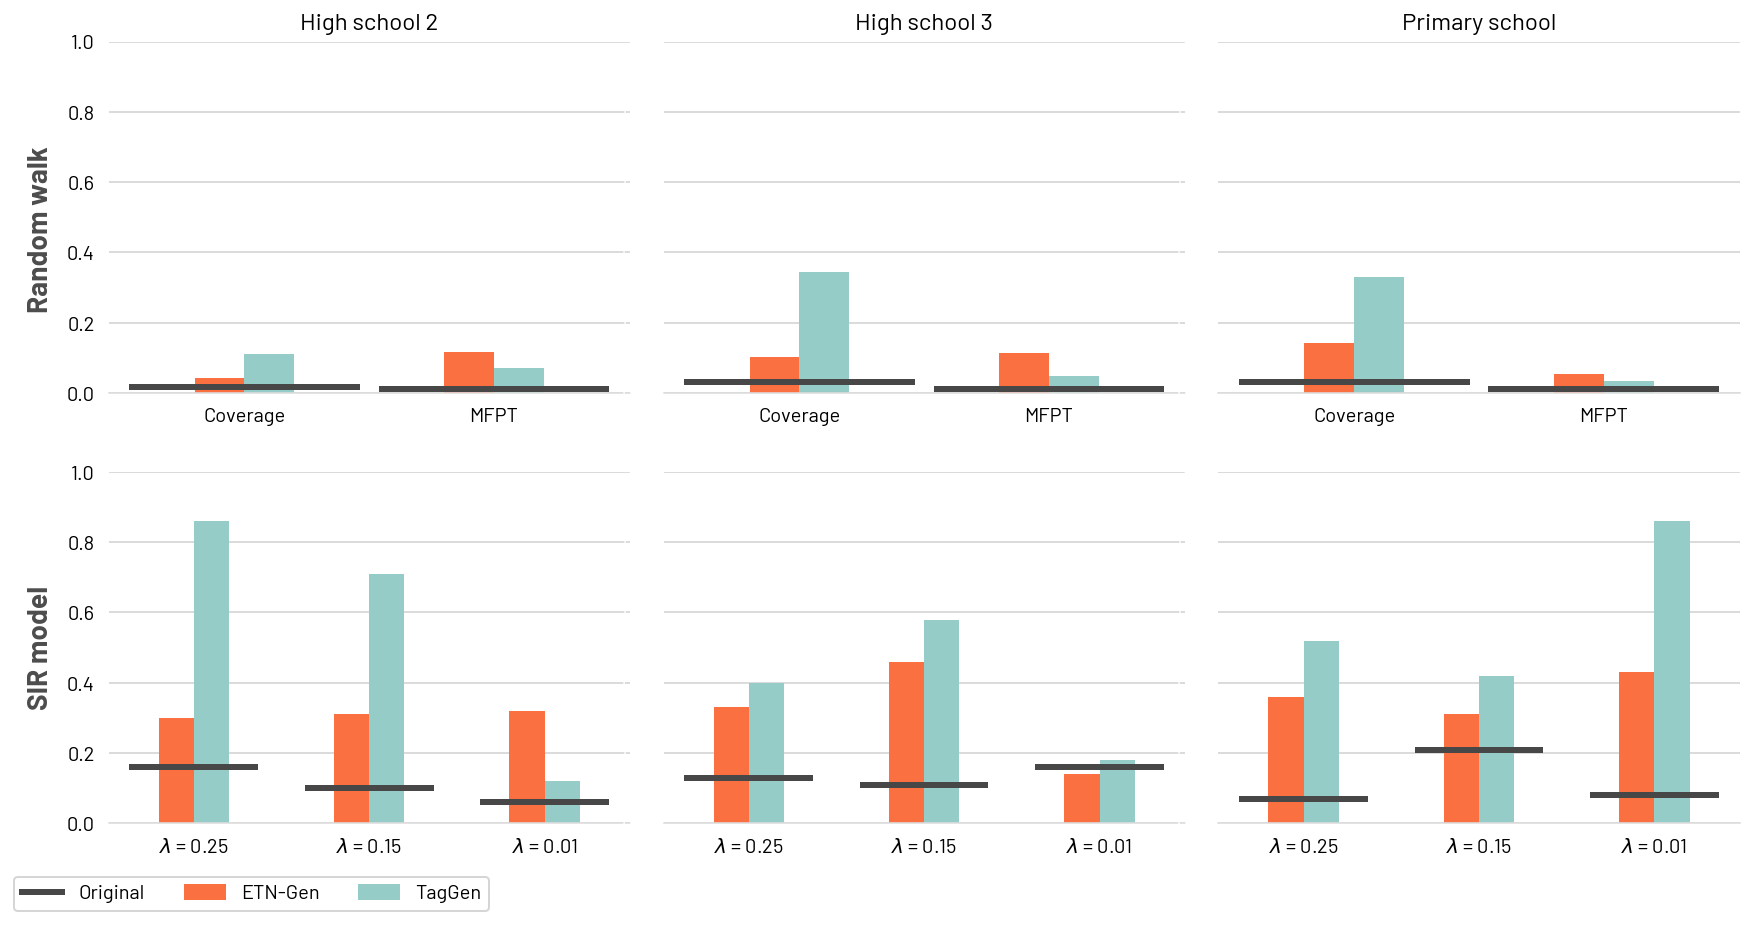

In [51]:
fig, ax = plt.subplots(2,3, figsize=(12,6))#, gridspec_kw={'width_ratios': [2, 3]})
fig.tight_layout(h_pad=2,w_pad=-1)


plot_cov_mfpt2(ax[0][0],"High_School12")
plot_r02(ax[1][0],"High_School12")

plot_cov_mfpt2(ax[0][1],"High_School13")
plot_r02(ax[1][1],"High_School13")

plot_cov_mfpt2(ax[0][2],"primary_school",legend=True)
plot_r02(ax[1][2],"primary_school",legend=True)

ax[0][1].tick_params(axis='y', colors='white')
ax[1][1].tick_params(axis='y', colors='white')
ax[0][2].tick_params(axis='y', colors='white')
ax[1][2].tick_params(axis='y', colors='white')


legend_elements = [Line2D([0], [0], color=ORIGINAL_COLOR, lw=3,label='Original'),
                   Patch(facecolor=ETN_COLOR, edgecolor=ETN_COLOR,label='ETN-Gen'),
                   Patch(facecolor=TAG_COLOR, edgecolor=TAG_COLOR,label='TagGen')]

# Create the figure
ax[1][0].legend(handles=legend_elements,loc='center left', bbox_to_anchor=(-0.2, -0.2),ncol=5)

fig.text(-0.01, 0.66, 'Random walk',fontdict={'size':14,'color':'#4d4d4d'},weight="bold",rotation=90)
fig.text(-0.01, 0.2, 'SIR model',fontdict={'size':14,'color':'#4d4d4d'},weight="bold",rotation=90)


#fig.savefig("dynamic_main_test_WithE_V4.pdf", bbox_inches = 'tight')

In [75]:
def plot_cov_mfpt3(ax,file_name,legend=False):
    
    if file_name == "High_School12":
        #ax.set_title("Hospital")
        ax.set_title("High school 2")
    if file_name == "High_School13":
        ax.set_title("High school 3")
    if file_name == "primary_school":
        ax.set_title("Primary school")
        
        
    cov = load_cov(file_name)
    mfpt = load_mfpt(file_name)
    
    x = np.arange(2)
    cov_ms, mfpt_ms = compute_ks_cov_mfpt(cov,mfpt)
    x1 = np.array([cov_ms[0],mfpt_ms[0]])
    x2 = np.array([cov_ms[1],mfpt_ms[1]])
    x3 = np.array([cov_ms[2],mfpt_ms[2]])
    
    
    width = 0.2
    rects1 = ax.bar(x - 0.1, x2[:,0], width, label='ETN-gen',color=ETN_COLOR)
    rects5 = ax.bar(x + 0.1, x3[:,0], width, label='TagGen',color=TAG_COLOR)
    ax.plot([-0.45,0.45],[x1[0],x1[0]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([1-0.45,1.45],[x1[1],x1[1]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    
              
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    
    ax.yaxis.grid(True, color='lightgrey')
    ax.xaxis.grid(False)
    
    #ax.yaxis.grid(True, color='#FFFFFF')
    #ax.set_facecolor('#EFEFEF')
    #ax.xaxis.grid(False)
    
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')    
    
    labels = ["Coverage","MFPT"]
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=0)
    ax.set_ylim((0,1))

def plot_r03(ax,file_name,legend=False):
    
    if file_name == "High_School12":
        #ax.set_title("Hospital")
        ax.set_title("High school 2")
    if file_name == "High_School13":
        ax.set_title("High school 3")
    if file_name == "primary_school":
        ax.set_title("Primary school")
        
    r0_025 = load_r0(file_name,"la025")
    r0_015 = load_r0(file_name,"la015")
    r0_001 = load_r0(file_name,"la001")
    x1,x2,x3 = compute_ks_r0(r0_025,r0_015,r0_001)
    x = np.arange(3)
    width = 0.2
    
    

    rects1 = ax.bar(x - 0.1, x2[:,0], width, label='ETN-gen',color=ETN_COLOR)
    rects5 = ax.bar(x + 0.1, x3[:,0], width, label='TagGen',color=TAG_COLOR)
    
    ax.plot([-0.45,0.45],[x1[0],x1[0]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([1-0.45,1.45],[x1[1],x1[1]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([2-0.45,2.45],[x1[2],x1[2]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    
          
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    
    #ax.yaxis.grid(True, color='#FFFFFF')
    #ax.set_facecolor('#EFEFEF')
    #ax.xaxis.grid(False)
    
    ax.yaxis.grid(True, color='lightgrey')
    ax.xaxis.grid(False)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    
    

    labels = [r"$\lambda$ = 0.25",r"$\lambda$ = 0.15",r"$\lambda$ = 0.01"]
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=0)
    ax.set_ylim((0,1))
    
    if legend:
        c = 0
        
def empty_plot(ax):
    
    ax.plot()
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # No ticks
    ax.set_xticks([])
    ax.set_yticks([])

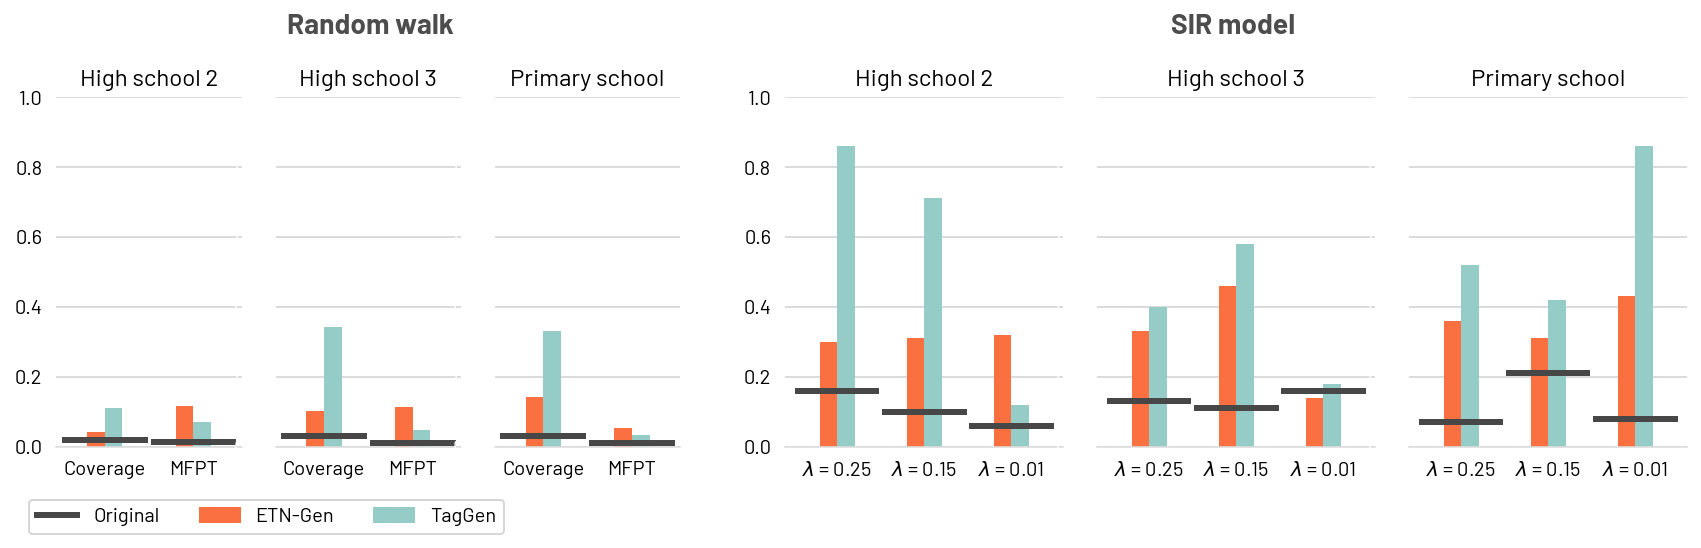

In [78]:
fig, ax = plt.subplots(1,7, figsize=(12,3), gridspec_kw={'width_ratios': [1,1,1,0.2,1.5,1.5,1.5]})
fig.tight_layout(w_pad=-1)


plot_cov_mfpt3(ax[0],"High_School12")
plot_cov_mfpt3(ax[1],"High_School13")
plot_cov_mfpt3(ax[2],"primary_school",legend=True)

empty_plot(ax[3])

plot_r03(ax[4],"High_School12")
plot_r03(ax[5],"High_School13")
plot_r03(ax[6],"primary_school",legend=True)


ax[1].tick_params(axis='y', colors='white')
ax[2].tick_params(axis='y', colors='white')

#ax[4].tick_params(axis='y', colors='white')
ax[5].tick_params(axis='y', colors='white')
ax[6].tick_params(axis='y', colors='white')

legend_elements = [Line2D([0], [0], color=ORIGINAL_COLOR, lw=3,label='Original'),
                   Patch(facecolor=ETN_COLOR, edgecolor=ETN_COLOR,label='ETN-Gen'),
                   Patch(facecolor=TAG_COLOR, edgecolor=TAG_COLOR,label='TagGen')]

# Create the figure
ax[0].legend(handles=legend_elements,loc='center left', bbox_to_anchor=(-0.2, -0.2),ncol=5)

fig.text(0.17, 1.08, 'Random walk',fontdict={'size':14,'color':'#4d4d4d'},weight="bold")
fig.text(0.682, 1.08, 'SIR model',fontdict={'size':14,'color':'#4d4d4d'},weight="bold")


fig.savefig("dynamic_SI_ks_face.pdf", bbox_inches = 'tight')

# sms calls

In [257]:

def compute_ks_cov_mfpt(cov,mfpt):
    
    mfpt_ms = [ks_2samp(mfpt[0],mfpt[1])[0]]
    cov_ms = [ks_2samp(cov[0],cov[1])[0]]
    for i in range(len(cov)-2):
        tmp = []
        tmp2 = []
        for j in cov[i+2]:
            tmp.append(ks_2samp(cov[0], j)[0])
        for j in [mfpt[i+2]]:
            tmp2.append(ks_2samp(mfpt[0], j)[0])
        cov_ms.append([np.mean(tmp),np.std(tmp)])
        mfpt_ms.append([np.mean(tmp2),np.std(tmp2)])
        
    return cov_ms,mfpt_ms

In [270]:

def compute_ks_r0(la25,la15,la01):
    orig_25 = la25[0]
    orig_15 = la15[0]
    orig_01 = la01[0]
    res = [[[ks_2samp(la25[0], la25[1])[0]],[ks_2samp(la15[0], la15[1])[0]],[ks_2samp(la01[0], la01[1])[0]]]]
    for i in range(len(la25)-2):
        i = i+2
        tmp = []
        for j in la25[i]:
            tmp.append(ks_2samp(orig_25, j)[0])
        ks_25 = np.array([np.mean(tmp),np.std(tmp)])
        
        tmp = []
        for j in la15[i]:
            tmp.append(ks_2samp(orig_15, j)[0])
        ks_15 = np.array([np.mean(tmp),np.std(tmp)])
        
        
        tmp = []
        for j in la01[i]:
            tmp.append(ks_2samp(orig_01, j)[0])
        ks_01 = np.array([np.mean(tmp),np.std(tmp)])
        
        res.append(np.array([ks_25,ks_15,ks_01]))
        
    return res

In [273]:
def plot_cov_mfpt3(ax,file_name,legend=False):
    

    if file_name == "DTU_calls_1set":
        #ax.set_title("Hospital")
        ax.set_title("Calls 1")
    if file_name == "FF_calls_1set":
        ax.set_title("Calls 2")
    if file_name == "DTU_SMS_1set":
        ax.set_title("SMS 1")
    if file_name == "FF_SMS_1set":
        ax.set_title("SMS 2")
        
        
        
    cov = load_cov(file_name)
    mfpt = load_mfpt(file_name)
    
    x = np.arange(2)
    cov_ms, mfpt_ms = compute_ks_cov_mfpt(cov,mfpt)
    x1 = np.array([cov_ms[0],mfpt_ms[0]])
    x2 = np.array([cov_ms[1],mfpt_ms[1]])
    x3 = np.array([cov_ms[2],mfpt_ms[2]])
    
    
    width = 0.2
    rects1 = ax.bar(x - 0.1, x2[:,0], width, label='ETN-gen',color=ETN_COLOR)
    rects5 = ax.bar(x + 0.1, x3[:,0], width, label='TagGen',color=TAG_COLOR)
    ax.plot([-0.45,0.45],[x1[0],x1[0]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([1-0.45,1.45],[x1[1],x1[1]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    
              
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    
    ax.yaxis.grid(True, color='lightgrey')
    ax.xaxis.grid(False)
    
    #ax.yaxis.grid(True, color='#FFFFFF')
    #ax.set_facecolor('#EFEFEF')
    #ax.xaxis.grid(False)
    
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')    
    
    labels = ["Coverage","MFPT"]
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=0)
    ax.set_ylim((0,1))

def plot_r03(ax,file_name,legend=False):


    if file_name == "DTU_calls_1set":
        #ax.set_title("Hospital")
        ax.set_title("Calls 1")
    if file_name == "FF_calls_1set":
        ax.set_title("Calls 2")
    if file_name == "DTU_SMS_1set":
        ax.set_title("SMS 1")
    if file_name == "FF_SMS_1set":
        ax.set_title("SMS 2")
        
    r0_025 = load_r0(file_name,"la025")
    r0_015 = load_r0(file_name,"la015")
    r0_001 = load_r0(file_name,"la001")
    x1,x2,x3 = compute_ks_r0(r0_025,r0_015,r0_001)
    x = np.arange(3)
    width = 0.2
    
    

    rects1 = ax.bar(x - 0.1, x2[:,0], width, label='ETN-gen',color=ETN_COLOR)
    rects5 = ax.bar(x + 0.1, x3[:,0], width, label='TagGen',color=TAG_COLOR)
    
    ax.plot([-0.45,0.45],[x1[0],x1[0]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([1-0.45,1.45],[x1[1],x1[1]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([2-0.45,2.45],[x1[2],x1[2]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    
          
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    
    #ax.yaxis.grid(True, color='#FFFFFF')
    #ax.set_facecolor('#EFEFEF')
    #ax.xaxis.grid(False)
    
    ax.yaxis.grid(True, color='lightgrey')
    ax.xaxis.grid(False)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    
    

    labels = [r"$\lambda$ = 0.25",r"$\lambda$ = 0.15",r"$\lambda$ = 0.01"]
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=0)
    ax.set_ylim((0,1))
    
    if legend:
        c = 0
        
def empty_plot(ax):
    
    ax.plot()
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # No ticks
    ax.set_xticks([])
    ax.set_yticks([])

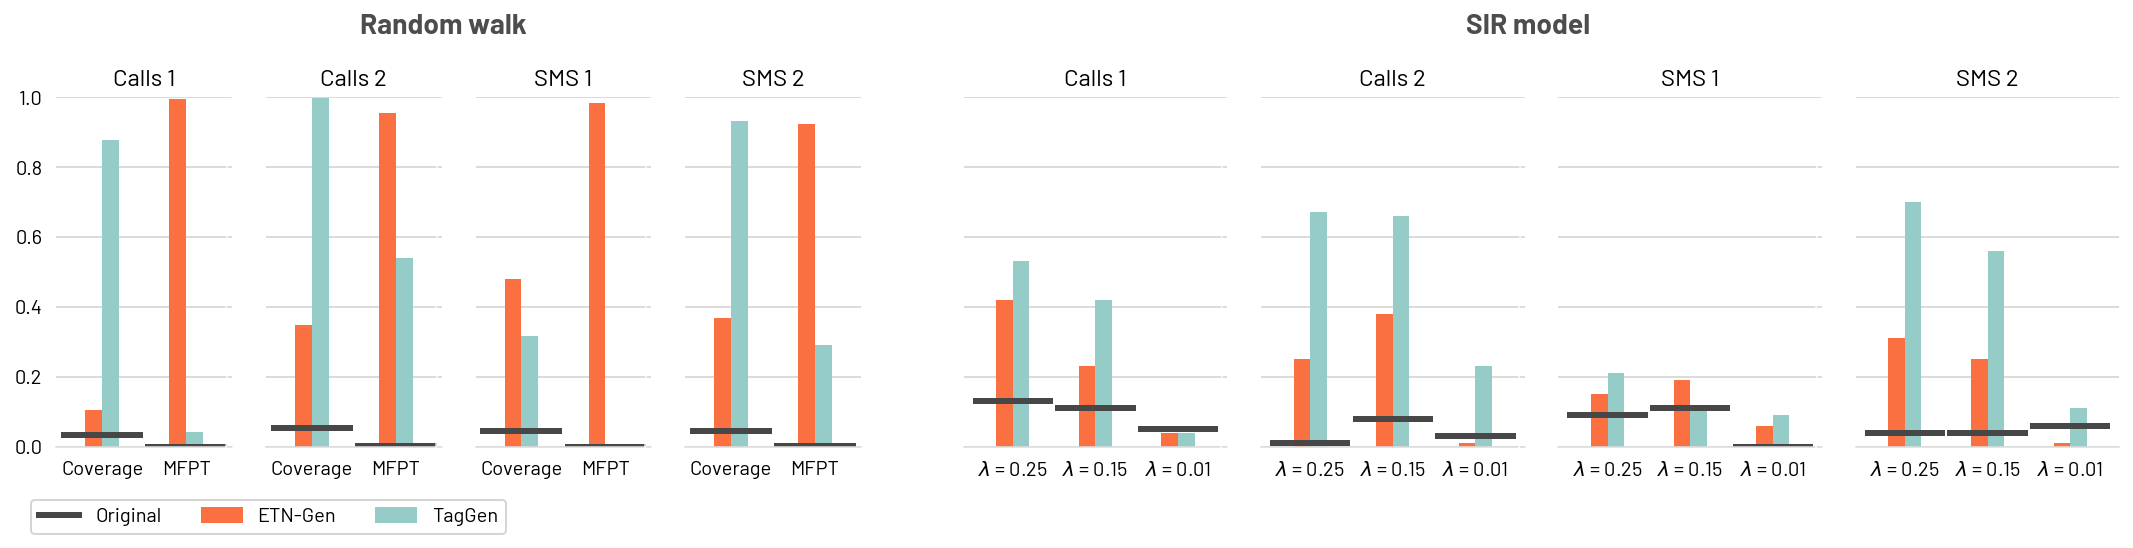

In [303]:
fig, ax = plt.subplots(1,9, figsize=(15,3), gridspec_kw={'width_ratios': [1,1,1,1,0.2,1.5,1.5,1.5,1.5]})
fig.tight_layout(w_pad=-1)


plot_cov_mfpt3(ax[0],"DTU_calls_1set")
plot_cov_mfpt3(ax[1],"FF_calls_1set")
plot_cov_mfpt3(ax[2],"DTU_SMS_1set")
plot_cov_mfpt3(ax[3],"FF_SMS_1set",legend=True)

empty_plot(ax[4])

plot_r03(ax[5],"DTU_calls_1set")
plot_r03(ax[6],"FF_calls_1set")
plot_r03(ax[7],"DTU_SMS_1set")
plot_r03(ax[8],"FF_SMS_1set",legend=True)


ax[1].tick_params(axis='y', colors='white')
ax[2].tick_params(axis='y', colors='white')
ax[3].tick_params(axis='y', colors='white')


#ax[4].tick_params(axis='y', colors='white')
ax[5].tick_params(axis='y', colors='white')
ax[6].tick_params(axis='y', colors='white')
ax[7].tick_params(axis='y', colors='white')
ax[8].tick_params(axis='y', colors='white')


legend_elements = [Line2D([0], [0], color=ORIGINAL_COLOR, lw=3,label='Original'),
                   Patch(facecolor=ETN_COLOR, edgecolor=ETN_COLOR,label='ETN-Gen'),
                   Patch(facecolor=TAG_COLOR, edgecolor=TAG_COLOR,label='TagGen')]

# Create the figure
ax[0].legend(handles=legend_elements,loc='center left', bbox_to_anchor=(-0.2, -0.2),ncol=5)

fig.text(0.17, 1.08, 'Random walk',fontdict={'size':14,'color':'#4d4d4d'},weight="bold")
fig.text(0.682, 1.08, 'SIR model',fontdict={'size':14,'color':'#4d4d4d'},weight="bold")


fig.savefig("dynamic_SI_ks_sms_calls.pdf", bbox_inches = 'tight')